# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name              -** Prasanna Daulatkar


# **Project Summary -**

Yes Bank, founded in 2004, is a banking company that provides a diverse range of products and services to both corporate and retail customers through retail banking and asset management. As a publicly traded company, it offers individuals the opportunity to invest and become shareholders. However, this also means that its valuation is influenced by investors and speculators, as share prices are often significantly affected by public sentiment. In our analysis, we utilized a dataset containing Yes Bank's stock price data, which includes five key features useful for predicting the closing price using machine learning. We developed a regression-based machine learning model for price prediction, employing some of the best-performing models.

### GitHub Link -

# **Problem Statement**


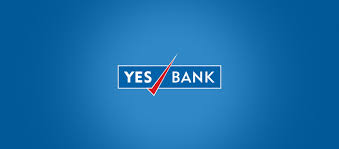


Yes Bank is a prominent financial institution in India. Since 2018, it has been in the spotlight due to a fraud case involving Rana Kapoor. This raised curiosity about its impact on the bank's stock prices and whether Time Series models or other predictive techniques could effectively capture such scenarios. The dataset contains the bank's monthly stock prices from its inception, including the opening, closing, highest, and lowest prices for each month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math # Import math directly
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Capstone Project/Yes Bank/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### First 5 Rows of Dataset

In [ ]:
# Dataset First 5 Rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Last 5 Rows of Dataset

In [ ]:
# Dataset Last 5 Rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


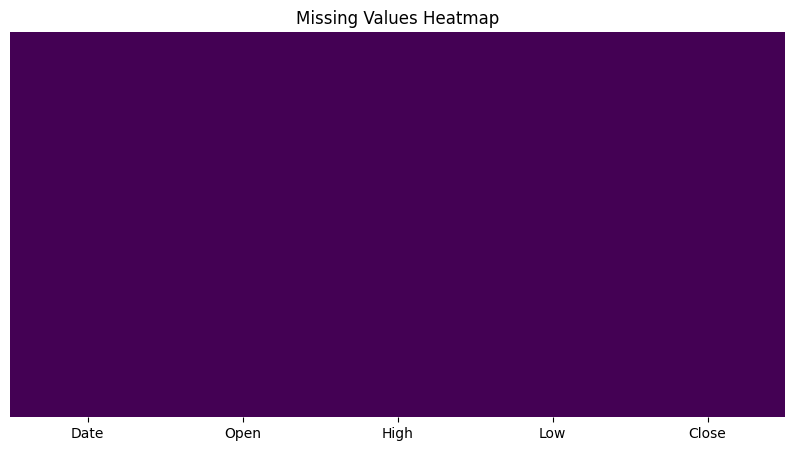

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

* There are 185 rows and 5 columns in the dataset
* No duplicate rows.
* No missing values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* Date : Date of record.

* Open : Opening price.

* High : Highest price in the month.

* Low : Lowest price in the month.

* Close : Closing price.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

### Convert Date to Proper Format

In [ ]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%b-%y")
# Sort values by Date
df = df.sort_values(by="Date")

### Extract Features from Date

In [ ]:
# Extract Year, Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
# Extract month from date column
df['Quarter'] = df['Date'].dt.quarter

### Check for Outliers

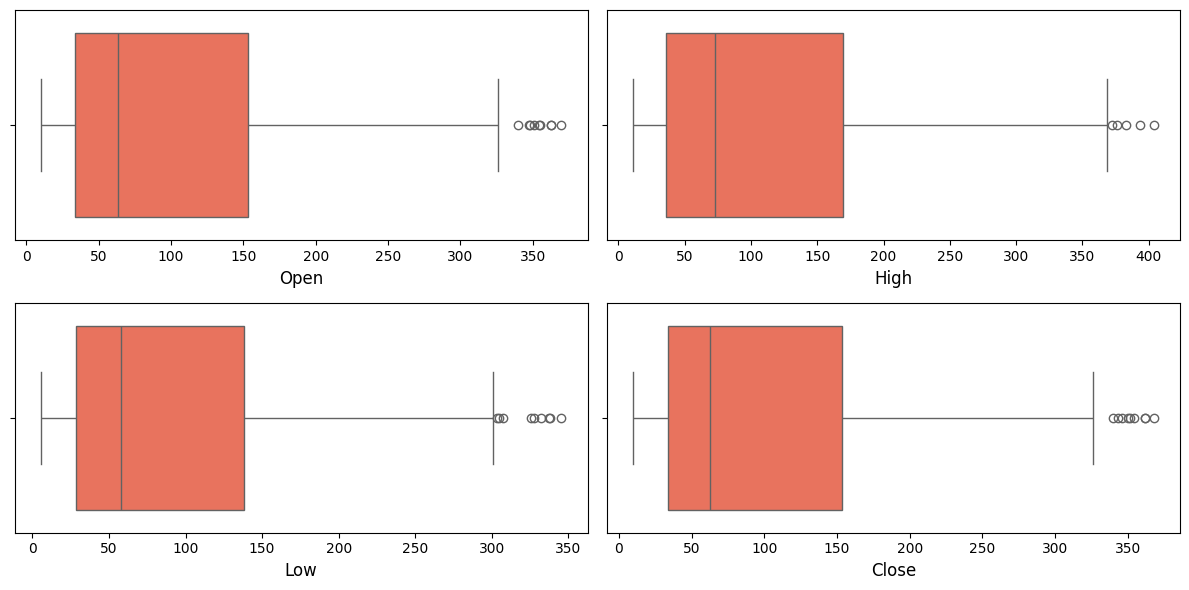

In [ ]:
# check for outliers in 'Open' , 'High', 'Low' and 'Close' columns
fig = plt.figure(figsize=(12,6))
c=1
for i in ['Open' , 'High', 'Low', 'Close'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout()

### What all manipulations have you done and insights you found?

* we have converted the string object to date for date column.
* we have extracted the year from 'Date' and created a seprate 'Year' column.
* Also created 'Month' and 'Quarter' variable from date.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 -Line Chart - Stock Price Trend Over Time

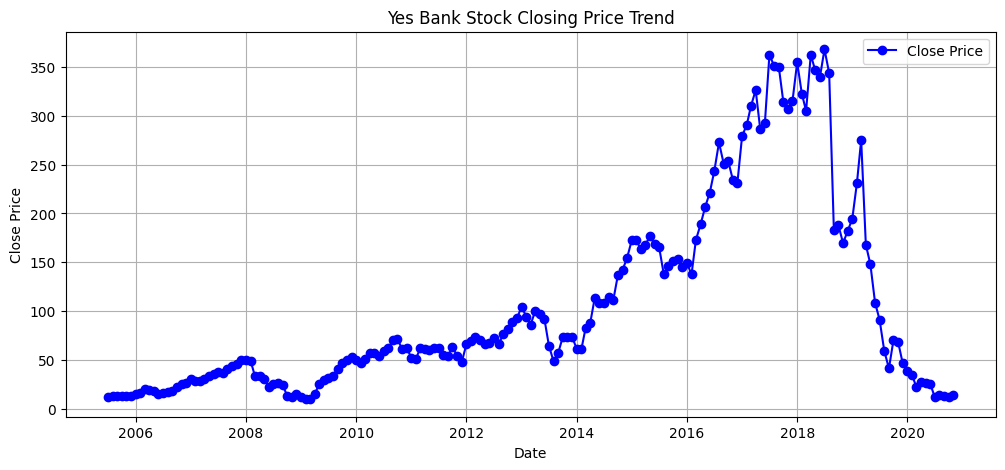

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], marker='o', linestyle='-', color='b', label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Yes Bank Stock Closing Price Trend")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is used to observe the trend of stock prices over time. It helps in understanding how the stock has performed historically, including long-term growth or decline.

##### 2. What is/are the insight(s) found from the chart?

* The stock price fluctuates over time, showing periods of growth and decline.

* Identifies bullish (upward) and bearish (downward) trends.

* Sudden peaks or drops may indicate market events or external factors impacting the stock.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* If there is a consistent upward trend, investors may consider long-term investment opportunities.

* Helps in predicting future trends using technical analysis.

Negative Impact:

* If there are multiple sharp declines, it could indicate market instability or poor company performance.

* Investors may avoid the stock due to high volatility and risk.

#### Chart - 2 -Candlestick Chart - Price Movement

In [ ]:
# Import the necessary library
import plotly.graph_objects as go
# Chart - 2 visualization code
fig = go.Figure(data=[go.Candlestick(x=df["Date"],
                                     open=df["Open"],
                                     high=df["High"],
                                     low=df["Low"],
                                     close=df["Close"],
                                     name="Stock Price")])

fig.update_layout(title="Yes Bank Candlestick Chart", xaxis_title="Date", yaxis_title="Price")
fig.show()

##### 1. Why did you pick the specific chart?

A candlestick chart is widely used in technical analysis to observe price movement patterns over time. It gives a more detailed picture of opening, closing, high, and low prices.

##### 2. What is/are the insight(s) found from the chart?

* Shows market volatility, identifying support and resistance levels.

* If there are long wicks/shadows, it indicates price rejection at high or low points.

* Bullish (green) and bearish (red) candlesticks help traders make buy/sell decisions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Helps traders identify trend reversals and entry/exit points for trading.

* Allows investors to time their trades effectively to maximize profits.

Negative Impact:

* Frequent long red candles may indicate a prolonged downtrend, scaring away investors.

* A bearish engulfing pattern could signal upcoming price declines, leading to negative sentiment in the market.

#### Chart - 3 -Boxplot - Detect Outliers in Stock Prices

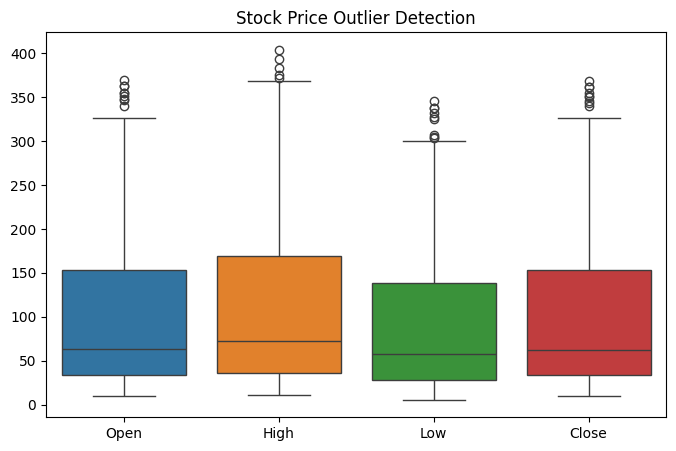

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Stock Price Outlier Detection")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot helps in identifying outliers in stock price data, which could indicate market shocks, fraud, or unexpected events.

##### 2. What is/are the insight(s) found from the chart?

* If several outliers exist, it suggests high volatility.

* A skewed boxplot (more values on one side) may indicate a long-term uptrend or downtrend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* If few or no outliers exist, it indicates stable price movements, which is good for investors.

* Can help investors avoid panic selling during temporary price spikes.

Negative Impact:

* A high number of outliers could indicate unpredictable fluctuations, discouraging investors.

* May suggest market manipulation or financial instability in the company.

#### Chart - 4 -Histogram - Distribution of Closing Prices

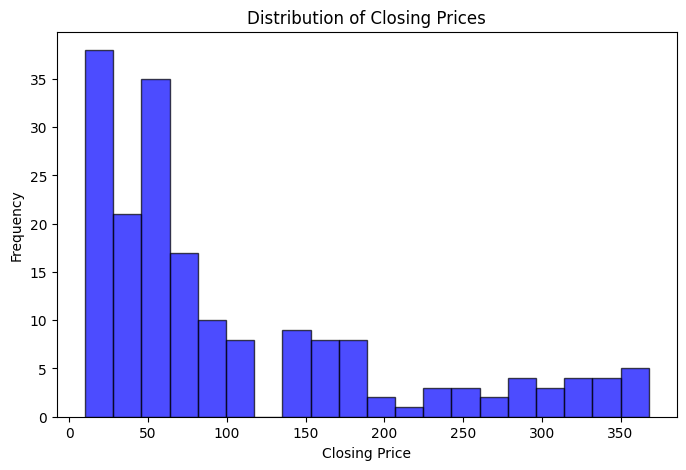

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 5))
plt.hist(df["Close"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows how frequently stock prices fall within specific price ranges. It helps in understanding price stability and volatility.

##### 2. What is/are the insight(s) found from the chart?

* A normal distribution indicates consistent price movements.

* A skewed histogram may show frequent price jumps or crashes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* If the histogram is centered around a stable price, it means the stock is less volatile and more predictable for investors.

Negative Impact:

* If the histogram is spread out, it suggests large price fluctuations, making it difficult for investors to predict returns.

* If prices are mostly in the lower range, it may indicate poor company performance.

#### Chart - 5 -Bar Chart - Monthly & Yearly Stock Price Trends

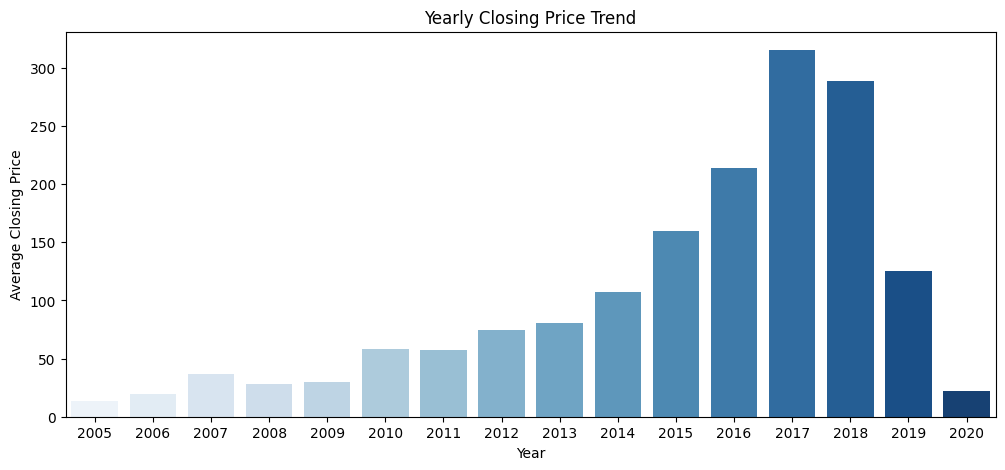

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 5))
sns.barplot(x=df["Year"], y=df["Close"], ci=None, palette="Blues")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.title("Yearly Closing Price Trend")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart helps in analyzing how stock prices behave over different years or months, revealing seasonal trends.

##### 2. What is/are the insight(s) found from the chart?

* If prices tend to rise in specific months (e.g., April, October), it indicates seasonality in stock performance.

* A year-over-year increase in average price suggests long-term growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Helps traders and businesses plan stock investments based on seasonal patterns.

* If the price consistently rises year-over-year, it shows strong company growth, attracting investors.

Negative Impact:

* If the price has been declining yearly, it may indicate long-term financial issues with the company.

* Investors may lose confidence, leading to reduced market demand for the stock.

#### Chart - 6 -Correlation Heatmap - Relationship Between Variables

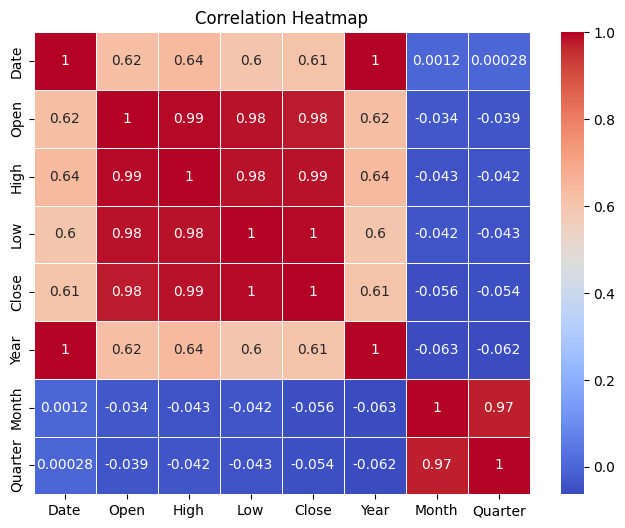

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap shows how stock price variables (Open, Close, High, Low) relate to each other.

##### 2. What is/are the insight(s) found from the chart?

* A high correlation between Open and Close suggests predictable price movements.

* A low correlation between High and Close may indicate volatile trading sessions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* If the correlation between variables is strong and stable, it helps in predictive modeling and risk assessment.

Negative Impact:

* If correlations change drastically over time, it suggests unpredictability, making it difficult to forecast stock movements.

#### Chart - 7 -Moving Averages Chart - Identify Trends

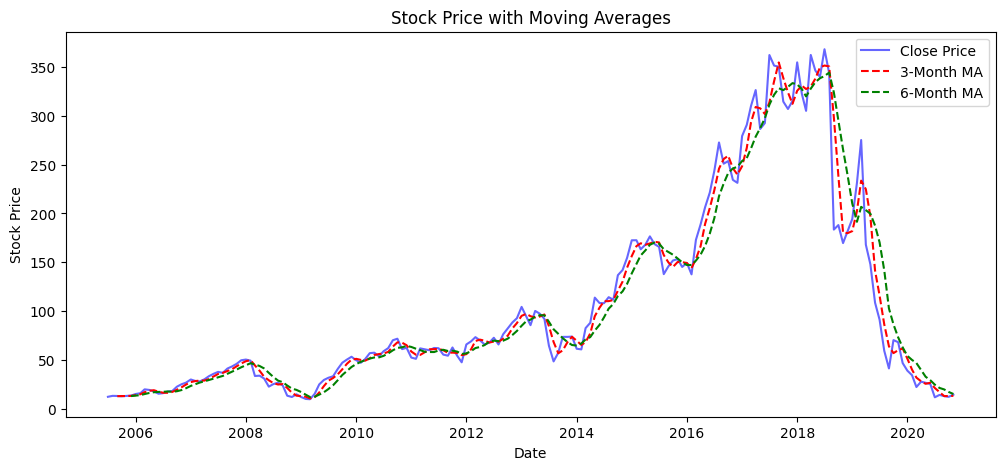

In [ ]:
# Chart - 7 visualization code
df["MA_3"] = df["Close"].rolling(window=3).mean()
df["MA_6"] = df["Close"].rolling(window=6).mean()

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Close Price", color='blue', alpha=0.6)
plt.plot(df["Date"], df["MA_3"], label="3-Month MA", color='red', linestyle="dashed")
plt.plot(df["Date"], df["MA_6"], label="6-Month MA", color='green', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A moving average chart smooths out short-term fluctuations and highlights long-term trends, helping investors make better decisions.

##### 2. What is/are the insight(s) found from the chart?

* If the 3-month MA crosses above the 6-month MA, it signals a bullish trend (buying opportunity).

* If the 3-month MA crosses below the 6-month MA, it signals a bearish trend (selling opportunity).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Helps long-term investors identify strong trends and avoid short-term noise.

* Useful for portfolio risk management.

Negative Impact:

* If moving averages show a long-term decline, it suggests the stock is in a bearish phase, which might result in investor sell-offs.

#### Chart - 8 - Pair Plot

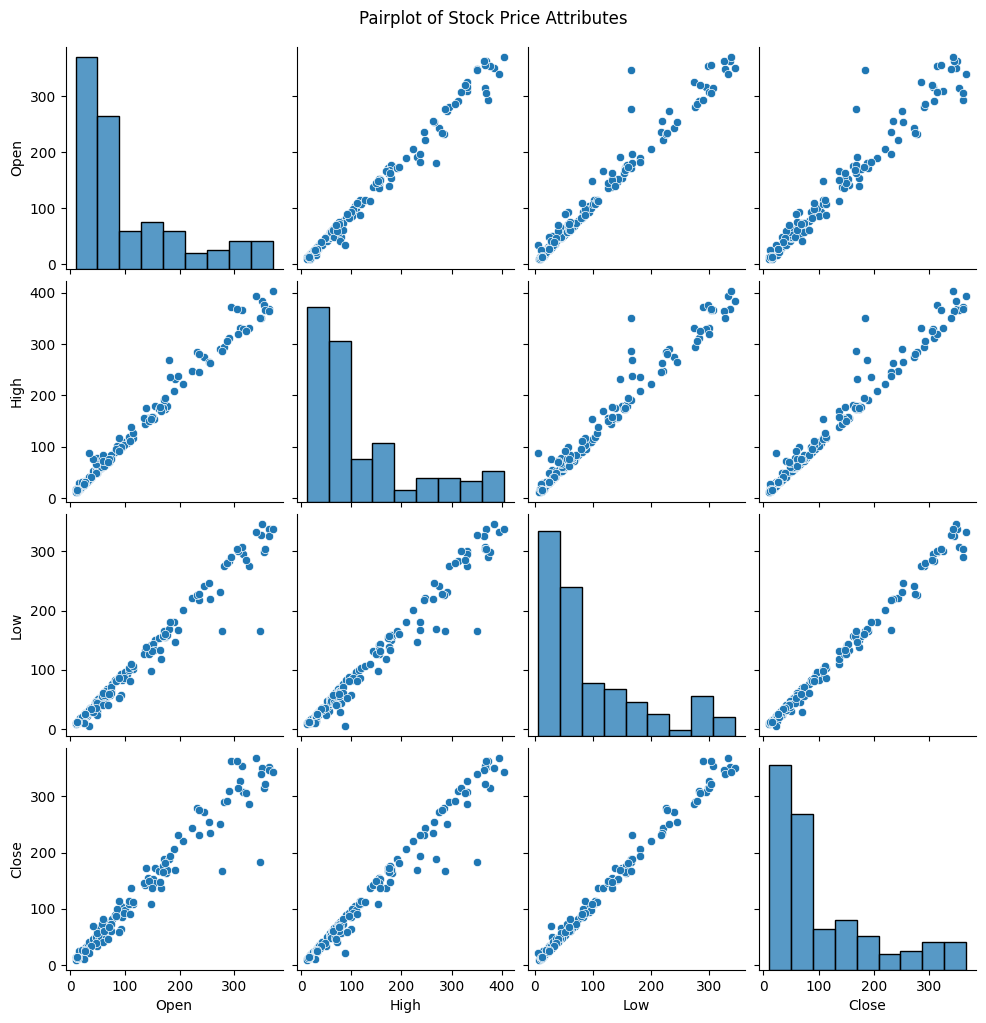

In [ ]:
# Pair Plot visualization code
# Select relevant numerical columns for visualization
selected_columns = ["Open", "High", "Low", "Close"]

# Create Pairplot
sns.pairplot(df[selected_columns])
plt.suptitle("Pairplot of Stock Price Attributes", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is useful for visualizing relationships between multiple numerical variables by plotting scatter plots and histograms. It helps in understanding:

Correlations between different stock price attributes (Open, High, Low, Close, etc.).

Patterns in price movements and how one variable affects another.

Outliers and trends in stock data.

##### 2. What is/are the insight(s) found from the chart?

Scatter plots in the pairplot will show:

* High correlation between Open, High, Low, and Close prices (expected in stock market data).

* If data points form a straight line, it means a strong correlation exists.

* Any outliers that might indicate abnormal stock movements.

Histograms in the diagonal will show:

* Distribution of stock prices (Normal, Skewed, or Multimodal).

* If stock prices are clustered within a specific range, suggesting price stability.

## ***5. Transforming and Splitting Data***

In [ ]:
# Dataset First 5 Rows
df.head()

,Date,Open,High,Low,Close,Year,Month,Quarter,MA_3,MA_6
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,3,NaN,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,3,NaN,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,3,13.060000,NaN
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,4,13.236667,NaN
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,4,13.233333,NaN


### X = Independent Variable Values
### Y = Dependent Variable Values

In [ ]:
# Splitting data into Dependent and Independent Variables
x = df[["Open","High","Low"]]
y = df['Close']

Data must be normally distributed, so applying normalization on X and Y.

### Training 80% and Test 20% Split

In [ ]:
# Splitting data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
# Checking shape of training dataset.
x_train.shape

(148, 3)

In [ ]:
# Checking shape of testing dataset.
x_test.shape

(37, 3)

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
# Fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(x_train,y_train)

In [ ]:
# Train accuracy of Linear Regression Model
round(linear_reg.score(x_train,y_train),3)

0.994

In [ ]:
# Test accuracy of Linear Regression Model
round(linear_reg.score(x_test,y_test),3)

0.998

In [ ]:
# Predictiion of Test data
y_pred = linear_reg.predict(x_test)

### Evaluation Metrics of Linear Regression

In [ ]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 19.989
RMSE : 4.471
MAE : 3.053
MAPE : 0.054
R2 : 0.998


### Linear Regression: Actual Vs. Predicted

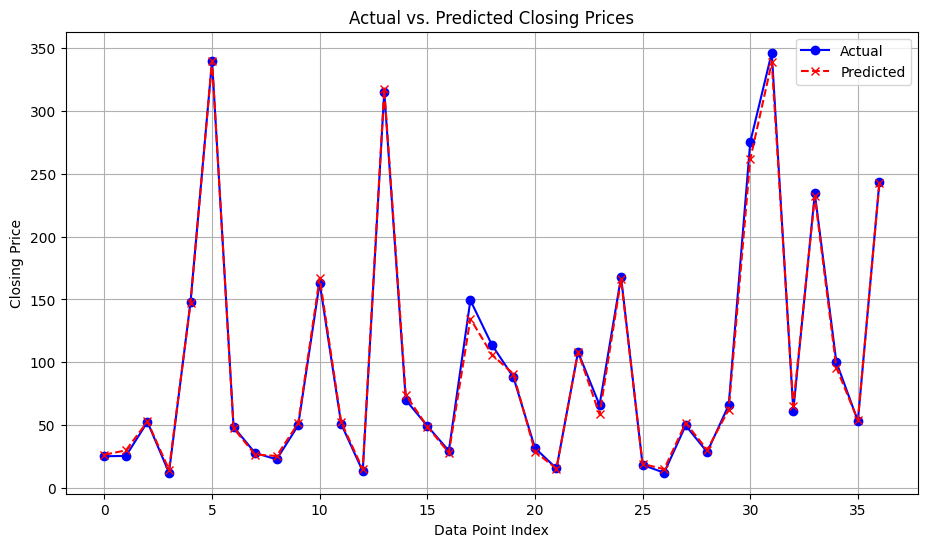

In [ ]:
plt.figure(figsize=(11, 6))  # Set the figure size for better visualization

# Plot the actual values (y_test)
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred)
plt.plot(np.array(y_pred), label="Predicted", color="red", marker='x', linestyle='--')

plt.grid(True)

plt.xlabel("Data Point Index")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")

plt.legend()

plt.show()

### ML Model - 2 Lasso Regression

In [ ]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg_model = lasso_reg.fit(x_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(x_train,y_train),3)

0.994

In [ ]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(x_test)

### Evaluation Metrics of Lasso Regression

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 20.427
RMSE : 4.52
MAE : 3.091
MAPE : 0.055
R2 : 0.998


### Lasso Regression: Actual Vs. Predicted

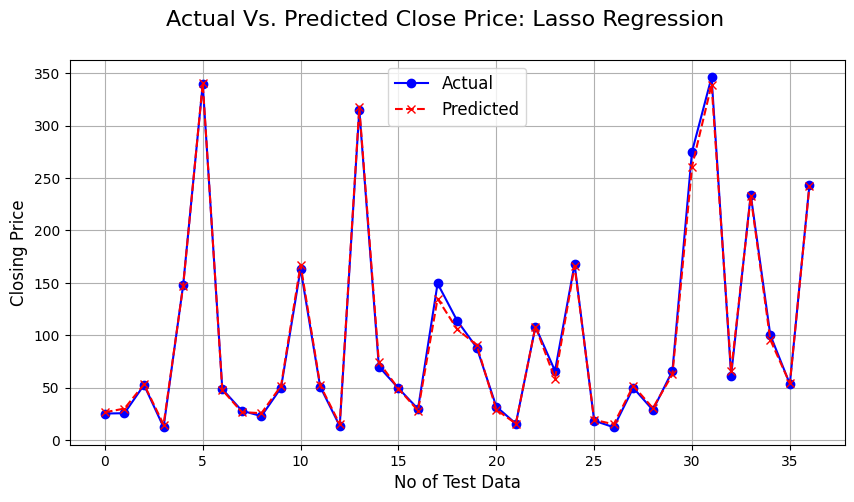

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the actual values (y_test)
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_lasso)
plt.plot(np.array(y_pred_lasso), label="Predicted", color="red", marker='x', linestyle='--')

plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual', 'Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

plt.show()

### Cross Validation on Lasso Regression

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.0
The negative mean squared error for is:  -59.381


In [ ]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(x_test)

### Evaluation Metrics of Lasso Regression after Validation

In [ ]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 19.996
RMSE : 4.472
MAE : 3.053
MAPE : 0.054
R2 : 0.998


### Lasso Regression After Validation: Actual Vs. Predicted

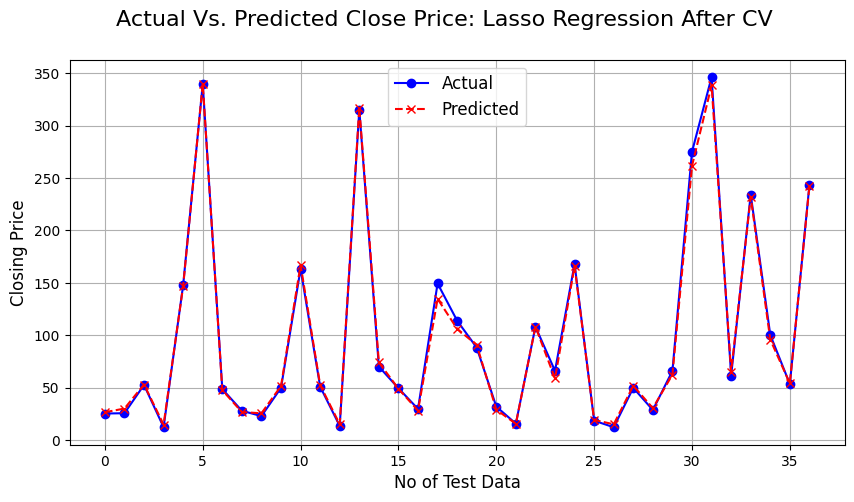

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting
plt.figure(figsize=(10, 5))

# Plot the actual values (y_test)
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_lasso_cv)
plt.plot(np.array(y_pred_lasso_cv), label="Predicted", color="red", marker='x', linestyle='--')

plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual', 'Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

plt.show()

### ML Model - 3 Ridge Regression

In [ ]:
#fitting data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(x_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(x_train,y_train),3)

0.994

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(x_test)

In [ ]:
# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 21.201
RMSE : 4.605
MAE : 3.131
MAPE : 0.056
R2 : 0.998


### Ridge Regression: Actual Vs. Predicted

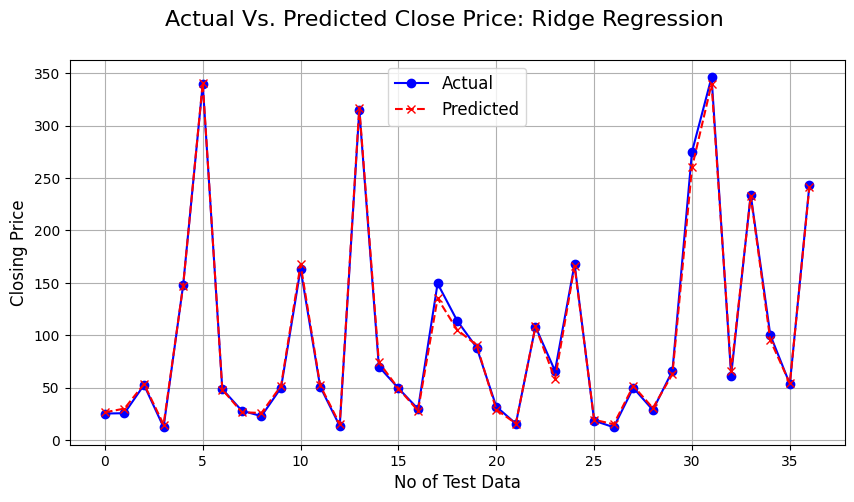

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10, 5))

# Plot the actual values (y_test)
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_ridge)
plt.plot(np.array(y_pred_ridge), label="Predicted", color="red", marker='x', linestyle='--')

plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual', 'Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

plt.show()

### Cross Validation on Ridge Regression

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.001
The negative mean squared error for is:  -59.334


In [ ]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(x_test)

### Evaluation Metrics of Ridge Regression after Validation

In [ ]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 20.095
RMSE : 4.483
MAE : 3.061
MAPE : 0.054
R2 : 0.998


### Ridge Regression After Validation: Actual Vs. Predicted

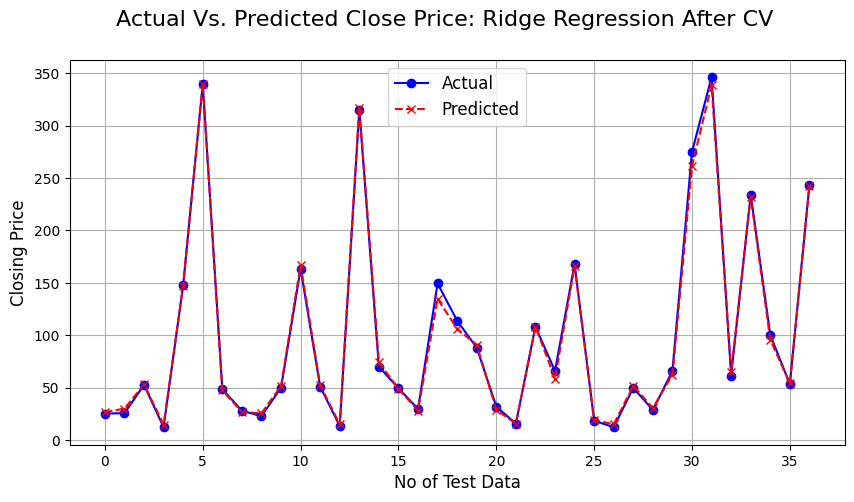

In [ ]:
# Assuming y_test and y_pred_ridge_cv are already defined

plt.figure(figsize=(10, 5))

# Plot the actual values (y_test)
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_ridge_cv)
plt.plot(np.array(y_pred_ridge_cv), label="Predicted", color="red", marker='x', linestyle='--')

plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual', 'Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

plt.show()

### ML Model - 4 Elastic Net

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(x_train,y_train)

In [ ]:
#accuracy of elastic net regression model
round(elastic.score(x_train,y_train),3)

0.945

In [ ]:
#prediction of test data.
y_pred_elastic = elastic.predict(x_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 436.358
RMSE : 20.889
MAE : 16.786
MAPE : 0.382
R2 : 0.953


### Elastic Net: Actual Vs. Predicted

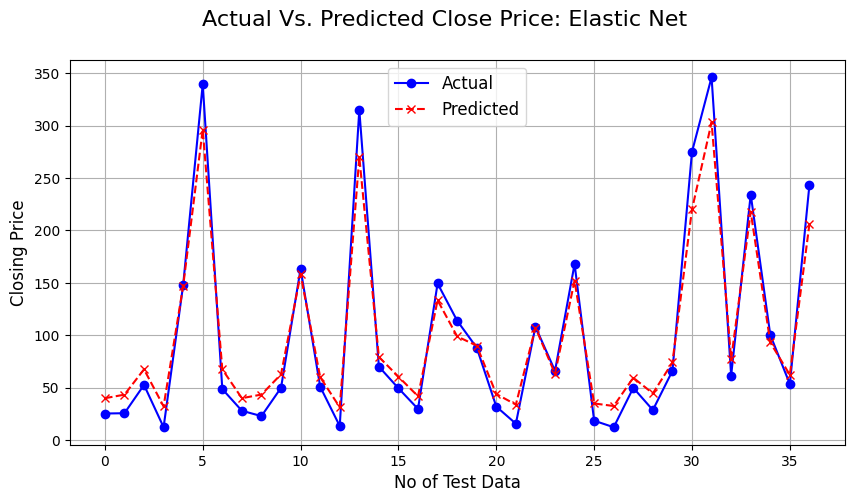

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10, 5))  # Set the figure size for better visualization

# Plot the actual values (y_test) with blue color and circle markers
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_elastic) with red color and 'x' markers
plt.plot(y_pred_elastic, label="Predicted", color="red", marker='x', linestyle='--')

# Set the title of the plot
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)

# Display the legend to distinguish between actual and predicted values
plt.legend(['Actual', 'Predicted'], fontsize=12)

# Label the x-axis as "No of Test Data"
plt.xlabel('No of Test Data', fontsize=12)

# Label the y-axis as "Closing Price"
plt.ylabel('Closing Price', fontsize=12)

# Add a grid to the plot for better readability
plt.grid(True)

# Show the plot
plt.show()

### ML Model - 5 Decision Tree

In [ ]:
# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Decision tree regressor accuracy in trainning data
tree_regressor.score(x_train, y_train)

1.0

In [ ]:
# Decision tree regressor accuracy in testing data
tree_regressor.score(x_test, y_test)

0.9931620546260782

In [ ]:
dec_tree_train = tree_regressor.predict(x_train)

In [ ]:
dec_tree_test = tree_regressor.predict(x_test)

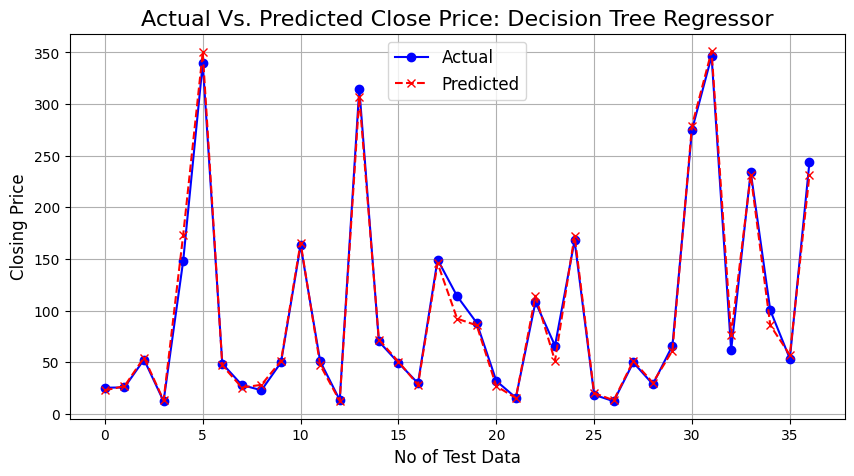

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting
plt.figure(figsize=(10, 5))

# Plot the actual values (y_test) with blue color and circle markers
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (dec_tree_test) with red color and 'x' markers
plt.plot(dec_tree_test, label="Predicted", color="red", marker='x', linestyle='--')

# Set the title of the plot
plt.title('Actual Vs. Predicted Close Price: Decision Tree Regressor', fontsize=16)

# Display the legend to distinguish between actual and predicted values
plt.legend(['Actual', 'Predicted'], fontsize=12)

# Label the x-axis and y-axis
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

plt.grid(True)

plt.show()

### Cross Validation on Elastic Net

In [ ]:
# Hyper-Parameter Tuning for Elastic Net
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.3}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 1e-05 0.3
The negative mean squared error for is:  -59.333


In [ ]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(x_test)

### Evaluation Metrics of Elastic Net after Validation

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 20.099
RMSE : 4.483
MAE : 3.061
MAPE : 0.054
R2 : 0.998


### Elastic Net After Validation: Actual Vs. Predicted

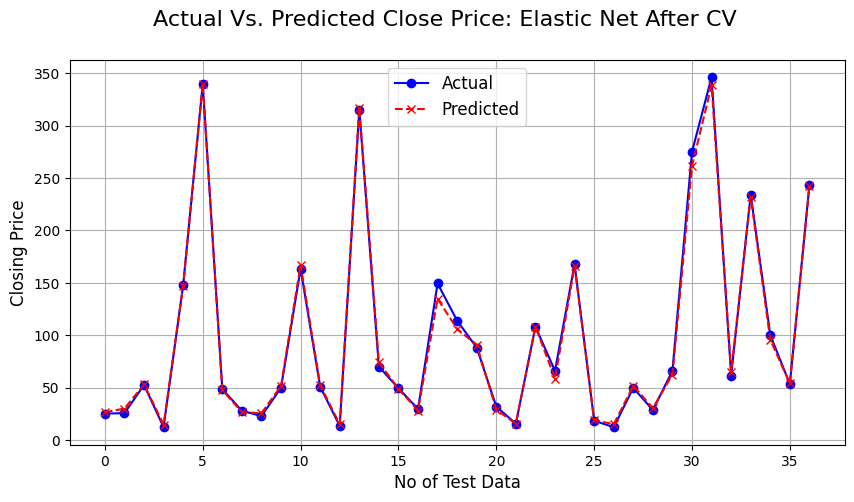

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10, 5))

# Plot the actual values (y_test) with blue color, circle markers, and a solid line
plt.plot(np.array(y_test), label="Actual", color="blue", marker='o', linestyle='-')

# Plot the predicted values (y_pred_elastic_cv) with red color, 'x' markers, and a dashed line
plt.plot(y_pred_elastic_cv, label="Predicted", color="red", marker='x', linestyle='--')

# Set the title of the plot
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)

# Display the legend to distinguish between actual and predicted values
plt.legend(['Actual', 'Predicted'], fontsize=12)

# Label the x-axis as "No of Test Data"
plt.xlabel('No of Test Data', fontsize=12)

# Label the y-axis as "Closing Price"
plt.ylabel('Closing Price', fontsize=12)

# Add a grid to the plot for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Decision tree regressor accuracy in testing data
tree_regressor.score(x_test, y_test)

0.9943055334059694

### Hyperparameter tuning

In [ ]:
param_grid = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": list(np.arange(1,50,3)),
              "max_depth": list(np.arange(1,10)),
              "min_samples_leaf": list(np.arange(1,10)),
              "max_leaf_nodes": list(np.arange(1,8)),
              }

In [ ]:
# Hyperparameter tuning for Decision Tree Regressor using GridseachCV
dtr = DecisionTreeRegressor()
tree_grid = GridSearchCV(dtr, param_grid, cv=5)

tree_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [np.int64(1), np.int64(2), np.int64(3),
                                       np.int64(4), np.int64(5), np.int64(6),
                                       np.int64(7), np.int64(8), np.int64(9)],
                         'max_leaf_nodes': [np.int64(1), np.int64(2),
                                            np.int64(3), np.int64(4),
                                            np.int64(5), np.int64(6),
                                            np.int64(7)],
                         'min_samples_l...np.int64(1), np.int64(2),
                                              np.int64(3), np.int64(4),
                                              np.int64(5), np.int64(6),
                                              np.int64(7), np.int64(8),
                                              np.int64(9)],
                         'min_samples_split': [np.int64(1), np.int64(4),
                                               np.int64(7), np.int64(10),
                                               np.int64(13), np.int64(16),
                                               np.int64(19), np.int64(22),
                                               np.int64(25), np.int64(28),
                                               np.int64(31), np.int64(34),
                                               np.int64(37), np.int64(40),
                                               np.int64(43), np.int64(46),
                                               np.int64(49)]})

In [ ]:
# hyperparameter tuning best parameters
tree_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': np.int64(8),
 'max_leaf_nodes': np.int64(7),
 'min_samples_leaf': np.int64(5),
 'min_samples_split': np.int64(4)}

In [ ]:
# Check accuracy score with GridSearchCV
tree_grid.score(x_train, y_train)

0.9823691969565722

### Decision Tree Regressor

In [ ]:
# Decison Tree Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
tree_regressor_best = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 6, max_leaf_nodes=7, min_samples_leaf = 5, min_samples_split=7)
tree_regressor_best.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=7, min_samples_leaf=5,
                      min_samples_split=7)

In [ ]:
# Trainning Score on Decision Tree Regressor with best parameters
tree_regressor_best.score(x_train, y_train)

0.9823691969565722

In [ ]:
# Testing Score on Decision Tree Regressor with best parameters
tree_regressor_best.score(x_test, y_test)

0.9686705459522194

### Random Forest Regressor

In [ ]:
# Do trainning on random forest regressor without any parameter
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Accuracy score of random forest regressor without any parameter
random_forest.score(x_train, y_train)

0.9980936064089065

### Hyperparameter tuning with GridSearchCV for Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor()
param_grid = {
            "n_estimators"      : np.arange(50,100),
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : np.arange(1,6),
            "bootstrap": [True, False]
            }
# random_forest_gridsearch = GridSearchCV(estimator = dtr, param_grid = grid_values, scoring = 'roc_auc', cv=5)
random_forest_gridsearch = GridSearchCV(random_forest, param_grid, n_jobs=-1, cv=5)
random_forest_gridsearch.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
# GridSearchCV hyperparameter tuning for Random Forest Regressor
random_forest_gridsearch.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': np.int64(3),
 'n_estimators': np.int64(66)}

In [ ]:
# Random forest Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
random_forest_best = RandomForestRegressor(bootstrap = True, max_features='sqrt', max_leaf_nodes=5, min_samples_leaf = 2, n_estimators=54)
random_forest_best.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', max_leaf_nodes=5, min_samples_leaf=2,
                      n_estimators=54)

In [ ]:
# Trainning Score on Decision Tree Regressor with best parameters
random_forest_best.score(x_train, y_train)

0.978244512417649

In [ ]:
# Testing Score on Decision Tree Regressor with best parameters
random_forest_best.score(x_test, y_test)

0.9812880013124035

### Evaluation Matrics Comparison

In [ ]:
def compare_model(x_train, x_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(x_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(x_test)
    #getting accuracy score for each model
    accuracy = model.score(x_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df

In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elastic_cv]

In [ ]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(x_train, x_test, y_train, y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,19.989,4.471,3.053,0.054,0.998
1,Lasso,20.427,4.520,3.091,0.055,0.998
2,Ridge,21.201,4.605,3.131,0.056,0.998
3,ElasticNet,4665.222,68.302,55.794,1.317,0.496


### Implementing from XGBRegressor

In [ ]:
#Import XGBRegressor
from xgboost import XGBRegressor
#initialize and fit GradientBoosting regressor
xgb_regressor=XGBRegressor()
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_train=xgb_regressor.predict(x_train)
y_pred_test=xgb_regressor.predict(x_test)

In [ ]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

MAE : 5.031767025509396
MSE : 54.590390619557056
RMSE : 7.388531019056296
r2_score_train : 0.9999998776678637
r2_score_test : 0.9941042941025591


In [ ]:
#Define all models
model=[
    ['LinearRegression:',linear_reg_model],
    ['Lasso:',lasso_model_cv],
    ['Ridge:',ridge_model_cv],
    ['ElasticNetCV:',elastic_model_cv],
    ['DecisionTreeRegression:',tree_regressor_best],
    ['RandomForestRegressor:',random_forest],
    ['GradientBoosting Regressor:',random_forest_gridsearch],
    ['XGB regressor :',xgb_regressor]

]

In [ ]:
model

[['LinearRegression:', LinearRegression()],
 ['Lasso:',
  GridSearchCV(cv=3, estimator=Lasso(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               return_train_score=True, scoring='neg_mean_squared_error')],
 ['Ridge:',
  GridSearchCV(cv=3, estimator=Ridge(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               scoring='neg_mean_squared_error')],
 ['ElasticNetCV:',
  GridSearchCV(cv=3, estimator=ElasticNet(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100],
           

In [ ]:
model_data=[]
for name,current_model in model:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(x_train,y_train)
    curr_model_data['MAE']=mean_absolute_error(y_test,current_model.predict(x_test))
    curr_model_data['MSE']=mean_squared_error(y_test,current_model.predict (x_test))
    curr_model_data['RMSE']=np.sqrt(mean_squared_error(y_test, current_model.predict(x_test)))
    curr_model_data['R2_score_train']=r2_score(y_train,current_model.predict (x_train))
    curr_model_data['R2_score_test']=r2_score(y_test,current_model.predict (x_test))
    model_data.append(curr_model_data)

In [ ]:
# create dataframe with evaluation metrics
table_df=pd.DataFrame(model_data)
table_df

,Name,MAE,MSE,RMSE,R2_score_train,R2_score_test
0,LinearRegression:,3.052765,19.988579,4.470859,0.994395,0.997841
1,Lasso:,3.053483,19.996124,4.471703,0.994395,0.997840
2,Ridge:,3.061022,20.095425,4.482792,0.994394,0.997830
3,ElasticNetCV:,3.061280,20.099160,4.483209,0.994394,0.997829
4,DecisionTreeRegression:,11.860779,290.090307,17.032038,0.982369,0.968671
5,RandomForestRegressor:,4.185854,35.150534,5.928789,0.998133,0.996204
6,GradientBoosting Regressor:,5.810755,99.645770,9.982273,0.999427,0.989238
7,XGB regressor :,5.031767,54.590391,7.388531,1.000000,0.994104


# **Conclusion**



*   We got a maximum accuracy of 99%.
*   Linear, lasso and ridge regression show almost same R squared values.


*   Whereas elastic net model shows lowest R squared value and high MSE, RMSE, MAE & MAPE.
*   Close, Open and high price of stock are strongly correlated with each other.

*   Regression models namely random forest regressor, xgboost regressor are build






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***